<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%2010%20-%20Model%20Selection%20%26%20Boosting/Section%2049%20-%20XGBoost/XGBoost_on_Churn_Modelling_Bank_Dataset%20with%20SMOTE%20and%20ADASYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('https://bit.ly/2QMuIPs')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
X = df.iloc[:, 3:-1]
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [6]:
X.shape

(10000, 10)

In [7]:
y = df.Exited
y[:2]

0    1
1    0
Name: Exited, dtype: int64

#Check for class imbalance

In [8]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#check for null values

In [9]:
df.isnull().sum().sort_values(ascending = False)[:2]

Exited             0
EstimatedSalary    0
dtype: int64

## get dummy variable

In [10]:
X = pd.get_dummies(X, drop_first = True).values
X.shape

(10000, 11)

In [11]:
y = df.Exited
y.shape

(10000,)

### Train test split

In [0]:
from sklearn.model_selection import train_test_split as tts

In [47]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

#feature scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#Over Sampling using SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [15]:
X_train.shape, y_train.shape

((8000, 11), (8000,))

In [85]:
X_train_smote, y_train_smote = SMOTE().fit_sample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape

((12736, 11), (12736,))

In [87]:
X_train_sc_smote, y_train_sc_smote = SMOTE().fit_sample(X_train_scaled, y_train)
X_train_sc_smote.shape, y_train_sc_smote.shape

((12736, 11), (12736,))

In [51]:
pd.Series(y_train_smote).value_counts()

1    6368
0    6368
dtype: int64

In [0]:
from imblearn.over_sampling import ADASYN

In [90]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_sample(X_train, y_train)
X_train_adasyn.shape, y_train_adasyn.shape

((12835, 11), (12835,))

In [91]:
X_train_sc_adasyn, y_train_sc_adasyn = ADASYN().fit_sample(X_train_scaled, y_train)
X_train_sc_adasyn.shape, y_train_sc_adasyn.shape

((12838, 11), (12838,))

In [53]:
pd.Series(y_train_adasyn).value_counts()

1    6470
0    6368
dtype: int64

In [55]:
X_train_adasyn[0]

array([ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
        0.64259497, -1.03227043,  1.10643166, -0.5698444 ,  1.74309049,
       -1.09168714])

# Train model

In [21]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 263 (delta 63), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (263/263), 68.80 KiB | 757.00 KiB/s, done.
Resolving deltas: 100% (150/150), done.


In [22]:
%cd my_methods

/content/my_methods


In [23]:
!ls

choose_best_classifier.py	      my_global_variables.py
choose_optimal_number_of_clusters.py  my_roc_curve.py
get_cross_validation.py		      print_model_results.py
my_cap_curve.py			      README.md
my_dummy_variable_2.py		      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from print_model_results import print_model_results
from get_cross_validation import get_cross_validation
import my_global_variables
my_global_variables.init()

In [0]:
import warnings
warnings.filterwarnings('ignore')

#PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [78]:
variance = pca.explained_variance_ratio_
variance

array([0.15034639, 0.1028392 , 0.09996458, 0.09293917, 0.09151456,
       0.09055952, 0.08971894, 0.08848339, 0.08157563, 0.06903591,
       0.04302272])

In [79]:
cum_variance = np.cumsum(variance)
cum_variance

array([0.15034639, 0.25318559, 0.35315016, 0.44608933, 0.53760389,
       0.62816341, 0.71788235, 0.80636574, 0.88794137, 0.95697728,
       1.        ])

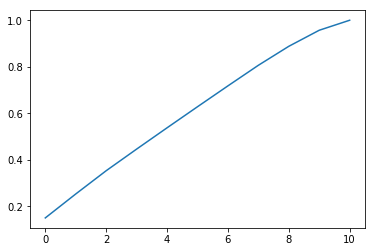

In [80]:
plt.plot(range(len(variance)), cum_variance)

##GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
classifier = XGBClassifier(random_state = 0)

In [98]:
param_grid = {'max_depth': range(10)}
grid = GridSearchCV(param_grid = param_grid, scoring = 'accuracy', estimator = classifier, verbose = 0, cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(0, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [99]:
grid.best_params_

{'max_depth': 4}

In [100]:
grid.best_score_

0.864375

In [95]:
classifier = XGBClassifier(random_state = 0)
param_grid = {'max_depth': range(10)}
grid_sc = GridSearchCV(param_grid = param_grid, scoring = 'accuracy', estimator = classifier, cv = 10)
grid_sc.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(0, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [96]:
grid.best_params_

{'max_depth': 4}

In [101]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
print_model_results(X_train, X_test, y_train, y_test, classifier, extra_name = 'simple')
get_cross_validation(X_train, y_train, classifier, extra_name = 'simple')

 Train score is 0.879625


Test score is 0.866



Train confusion matrix is 
 [[6208  160]
 [ 803  829]]

Test confusion matrix is 
 [[1526   69]
 [ 199  206]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

10 fold cross-validation for -- XGBClassifier_simple-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.86891386 0.86267166 0.88       0.865      0.85875    0.86375
 0.87       0.85625    0.84355444 0.87484355]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.00969952339670716




'Mean for 10 fold cross-validation score:-- 0.8643733515599242'

###train model with scaled features

In [64]:
X_train_scaled[0]

array([ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
        0.64259497, -1.03227043,  1.10643166, -0.5698444 ,  1.74309049,
       -1.09168714])

In [102]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
print_model_results(X_train_scaled, X_test_scaled, y_train, y_test, classifier, extra_name = 'scaled')
classifier = XGBClassifier(max_depth = 4, random_state = 0)
get_cross_validation(X_train_scaled, y_train, classifier, extra_name = 'scaled')

 Train score is 0.879625


Test score is 0.866



Train confusion matrix is 
 [[6208  160]
 [ 803  829]]

Test confusion matrix is 
 [[1526   69]
 [ 199  206]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

10 fold cross-validation for -- XGBClassifier_scaled-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.86891386 0.86267166 0.88       0.865      0.85875    0.86375
 0.87       0.85625    0.84355444 0.87484355]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.00969952339670716




'Mean for 10 fold cross-validation score:-- 0.8643733515599242'

##train model with smote features

In [104]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
print_model_results(X_train_smote, X_test, y_train_smote, y_test, classifier, extra_name = 'smote')
model = XGBClassifier(max_depth = 4)
get_cross_validation(X_train_smote, y_train_smote, model, extra_name = 'smote')

 Train score is 0.9158291457286433


Test score is 0.8635



Train confusion matrix is 
 [[6081  287]
 [ 785 5583]]

Test confusion matrix is 
 [[1491  104]
 [ 169  236]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1595
           1       0.69      0.58      0.63       405

    accuracy                           0.86      2000
   macro avg       0.80      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000

10 fold cross-validation for -- XGBClassifier_smote-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.72135008 0.70408163 0.84065934 0.95839874 0.96703297 0.96389325
 0.96703297 0.96310832 0.96226415 0.96540881]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.10120326346200428




'Mean for 10 fold cross-validation score:-- 0.9013230255817856'

In [108]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
print_model_results(X_train_sc_smote, X_test_scaled, y_train_sc_smote, y_test, classifier, extra_name = 'sc_smote')
model = XGBClassifier(max_depth = 4)
get_cross_validation(X_train_sc_smote, y_train_sc_smote, model, extra_name = 'sc_smote')

 Train score is 0.8983197236180904


Test score is 0.84



Train confusion matrix is 
 [[5826  542]
 [ 753 5615]]

Test confusion matrix is 
 [[1411  184]
 [ 136  269]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1595
           1       0.59      0.66      0.63       405

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000

10 fold cross-validation for -- XGBClassifier_sc_smote-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.76295133 0.75510204 0.83908948 0.91836735 0.92307692 0.92543171
 0.933281   0.92229199 0.91902516 0.91823899]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.06629443800979158




'Mean for 10 fold cross-validation score:-- 0.8816855987678089'

##train model with adasyn features

In [106]:
classifier = XGBClassifier(max_depth = 4, random_state = 0)
model = print_model_results(X_train_adasyn, X_test, y_train_adasyn, y_test, classifier, extra_name = 'adasyn')
model = XGBClassifier(max_depth = 4)
get_cross_validation(X_train_adasyn, y_train_adasyn, model, extra_name = 'adasyn')

 Train score is 0.9177249707830152


Test score is 0.862



Train confusion matrix is 
 [[6085  283]
 [ 773 5694]]

Test confusion matrix is 
 [[1489  106]
 [ 170  235]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1595
           1       0.69      0.58      0.63       405

    accuracy                           0.86      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000

10 fold cross-validation for -- XGBClassifier_adasyn-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.7211838  0.69781931 0.85981308 0.96261682 0.9665109  0.97040498
 0.9665109  0.96336711 0.96177847 0.96411856]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.101989752204021




'Mean for 10 fold cross-validation score:-- 0.9034123957305376'

In [107]:
classifier = XGBClassifier(max_depth = 9, random_state = 0)
model = print_model_results(X_train_sc_adasyn, X_test_scaled, y_train_sc_adasyn, y_test, classifier, extra_name = 'sc_adasyn')
model = XGBClassifier(max_depth = 9)
get_cross_validation(X_train_sc_adasyn, y_train_sc_adasyn, model, extra_name = 'sc_adasyn')

 Train score is 0.964947811185543


Test score is 0.854



Train confusion matrix is 
 [[6229  139]
 [ 311 6159]]

Test confusion matrix is 
 [[1465  130]
 [ 162  243]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1595
           1       0.65      0.60      0.62       405

    accuracy                           0.85      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000

10 fold cross-validation for -- XGBClassifier_sc_adasyn-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.74610592 0.73286604 0.86760125 0.93535826 0.95482866 0.95093458
 0.95794393 0.94626168 0.94154326 0.94777864]


variance in scores for 10 fold cross-validationn for XGBClassifier:-- 0.08305935750401146




'Mean for 10 fold cross-validation score:-- 0.8981222213319155'

 Done 6/6

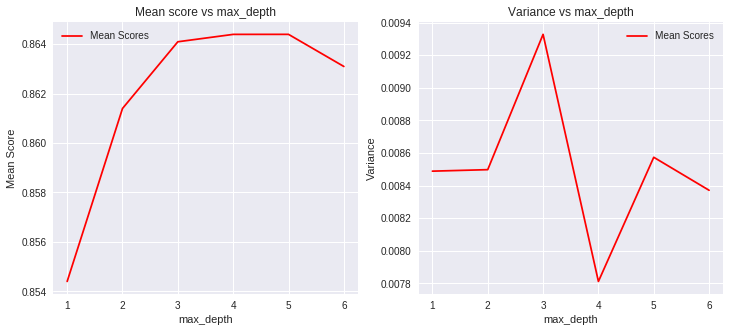

In [0]:
x = range(1, 7)
means = []
variances = []
import sys
for i in x:
  sys.stdout.write(f'\r Running {i}/{len(x)}')
  model = XGBClassifier(max_depth = i)
  mean, variance = get_cross_validation(X, y, model, cv = 10, out = False, variance = True)
  means.append(mean)
  variances.append(variance)
  sys.stdout.flush()
  if i == x[-1]:
    sys.stdout.write(f'\r Done {i}/{len(x)}')

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title('Mean score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Score')
plt.plot(x, means, c = 'r', label = 'Mean Scores')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Variance vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Variance')
plt.plot(x, variances, c = 'r', label = 'Mean Scores')
plt.legend()
plt.show()

In [109]:
my_global_variables.model_cm

{'XGBClassifier_adasyn': {'test': array([[1489,  106],
         [ 170,  235]]), 'train': array([[6085,  283],
         [ 773, 5694]])},
 'XGBClassifier_sc_adasyn': {'test': array([[1465,  130],
         [ 162,  243]]), 'train': array([[6229,  139],
         [ 311, 6159]])},
 'XGBClassifier_sc_smote': {'test': array([[1411,  184],
         [ 136,  269]]), 'train': array([[5826,  542],
         [ 753, 5615]])},
 'XGBClassifier_scaled': {'test': array([[1526,   69],
         [ 199,  206]]), 'train': array([[6208,  160],
         [ 803,  829]])},
 'XGBClassifier_simple': {'test': array([[1526,   69],
         [ 199,  206]]), 'train': array([[6208,  160],
         [ 803,  829]])},
 'XGBClassifier_smote': {'test': array([[1491,  104],
         [ 169,  236]]), 'train': array([[6081,  287],
         [ 785, 5583]])}}

In [110]:
my_global_variables.model_cross_validation

{'XGBClassifier_adasyn': {'mean': 0.9034123957305376,
  'variance': 0.101989752204021},
 'XGBClassifier_sc_adasyn': {'mean': 0.8981222213319155,
  'variance': 0.08305935750401146},
 'XGBClassifier_sc_smote': {'mean': 0.8816855987678089,
  'variance': 0.06629443800979158},
 'XGBClassifier_scaled': {'mean': 0.8643733515599242,
  'variance': 0.00969952339670716},
 'XGBClassifier_simple': {'mean': 0.8643733515599242,
  'variance': 0.00969952339670716},
 'XGBClassifier_smote': {'mean': 0.9013230255817856,
  'variance': 0.10120326346200428}}

In [111]:
my_global_variables.model_score

{'XGBClassifier_adasyn': {'test': 0.862, 'train': 0.9177249707830152},
 'XGBClassifier_sc_adasyn': {'test': 0.854, 'train': 0.964947811185543},
 'XGBClassifier_sc_smote': {'test': 0.84, 'train': 0.8983197236180904},
 'XGBClassifier_scaled': {'test': 0.866, 'train': 0.879625},
 'XGBClassifier_simple': {'test': 0.866, 'train': 0.879625},
 'XGBClassifier_smote': {'test': 0.8635, 'train': 0.9158291457286433}}

#Visualise All model Performance with heatmap

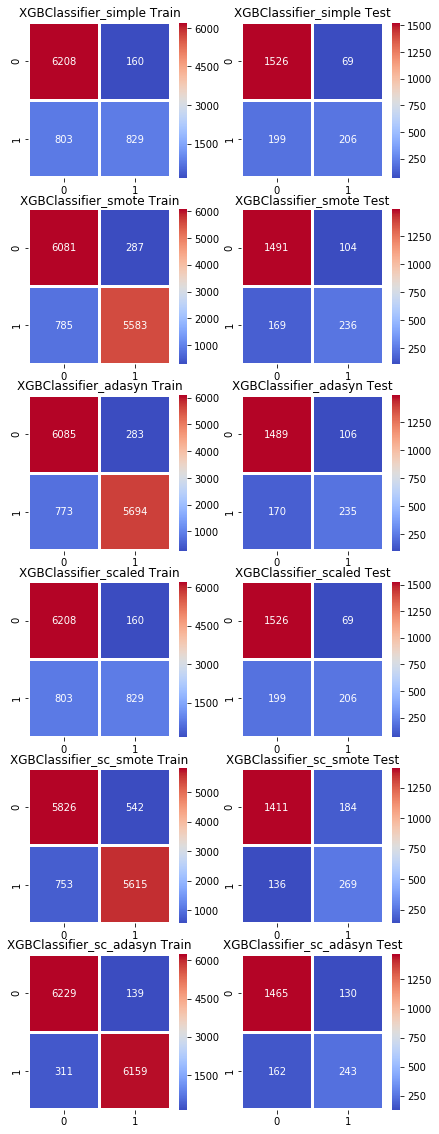

In [115]:
import seaborn as sns
plt.figure(figsize = (7, 20))
n = 1
for i, j in my_global_variables.model_cm.items():
  plt.subplot(6, 2, n)
  plt.title(f'{i} Train')
  sns.heatmap(j.get('train'), annot = True, cmap = 'coolwarm', lw = 2, fmt = 'd')
  n += 1
  plt.subplot(6, 2, n)
  plt.title(f'{i} Test')
  sns.heatmap(j.get('test'), annot = True, cmap = 'coolwarm', lw = 2, fmt = 'd')
  n += 1
  
plt.show()